In [2]:
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
from scipy.stats import zscore, ks_2samp
from sklearn.impute import KNNImputer
import missingno as msno
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import pickle
import math

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
import sklearn.metrics as metrics 
import math
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [13]:
df_model = pd.read_csv(r'C:\Users\matar.aviv\Desktop\python\Data Science Bar Ilan\ML Project - Dating App\df_model.csv')
df_model = df_model.set_index('userId')
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 4e3842f79b70e7ea57000064 to CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2qcCzBYw1uA==
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     4008 non-null   float64
 1   counts_pictures         4008 non-null   float64
 2   counts_profileVisits    4008 non-null   float64
 3   counts_kisses           4008 non-null   float64
 4   flirtInterests_chat     4008 non-null   float64
 5   flirtInterests_friends  4008 non-null   float64
 6   flirtInterests_date     4008 non-null   float64
 7   isVerified              4008 non-null   float64
 8   lastOnlineTs            4008 non-null   float64
 9   lang_count              4008 non-null   float64
 10  lang_fr                 4008 non-null   float64
 11  lang_de                 4008 non-null   float64
 12  countDetails            4008 non-null   float64
 13  distance            

In [14]:
from sklearn.model_selection import train_test_split

# Assuming df_model is already defined and contains the necessary features and target variable

# Define the target and feature set
X = df_model.drop(columns=['counts_kisses'])
y = df_model['counts_kisses']

# Total number of samples
total_samples = len(df_model)

# First split: training and temporary (test + dev)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: testing and development (dev)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Calculate percentages
train_percent = (X_train.shape[0] / total_samples) * 100
dev_percent = (X_dev.shape[0] / total_samples) * 100
test_percent = (X_test.shape[0] / total_samples) * 100

# Output the sizes of each set in percentages
print(f"Training set size: {train_percent:.2f}%")
print(f"Validation (Dev) set size: {dev_percent:.2f}%")
print(f"Testing set size: {test_percent:.2f}%")

Training set size: 69.99%
Validation (Dev) set size: 15.00%
Testing set size: 15.02%


In [15]:
def regressionMetrics(y, yhat):
    res = {'MSE': metrics.mean_squared_error(y,yhat),
           'RMSE': np.sqrt(metrics.mean_squared_error(y,yhat)),
           'MAE': metrics.mean_absolute_error(y,yhat),
           'RMSLE': np.sqrt(metrics.mean_squared_log_error(y,yhat))
          }
    return res


In [16]:
models_list = pd.DataFrame()

In [17]:
mod1 = LinearRegression()
mod1.fit(X_train,y_train)

pred1 = mod1.predict(X_train)

In [18]:
# Ensure there are no zero or negative values for RMSLE calculation
pred1_pos = np.maximum(pred1, 0)  # Replace negative values with 0

In [20]:
model_dict = {'model': "Linear Regression"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_train, pred1_pos)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,25610.068372,160.031461,64.328961,1.382519


<Axes: xlabel='counts_kisses'>

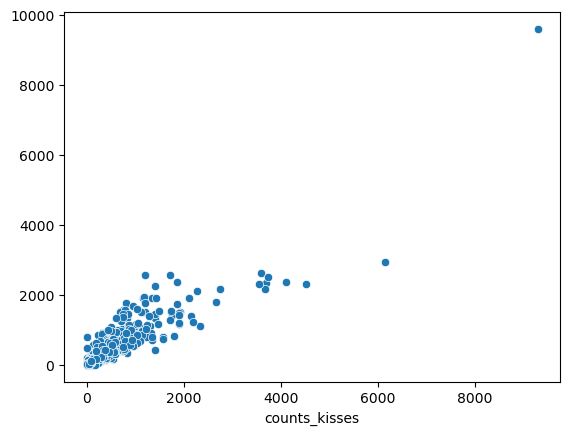

In [21]:
sb.scatterplot(x=y_train, y=pred1_pos)

In [22]:
mod2 = DecisionTreeRegressor(random_state=1)
mod2.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [23]:
pred2 = mod2.predict(X_train)
model_dict = {'model': "Decision Tree"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_train, pred2)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,25610.068372,160.031461,64.328961,1.382519
1,Decision Tree,0.000000,0.000000,0.000000,0.000000


<Axes: xlabel='counts_kisses'>

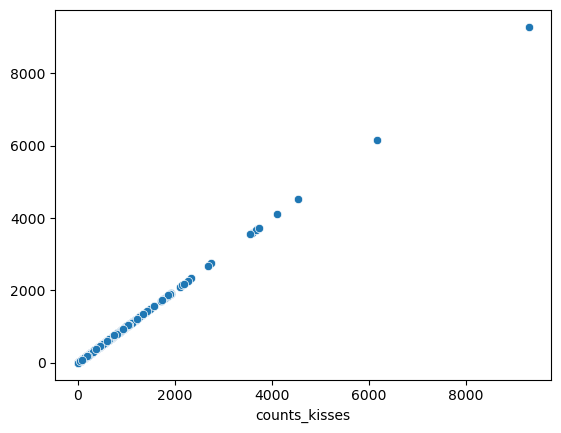

In [24]:
sb.scatterplot(x=y_train, y=pred2)

In [25]:
mod3 = RandomForestRegressor(random_state=1)
mod3.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [26]:
pred3 = mod3.predict(X_train)
model_dict = {'model': "RandomForest"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_train, pred3)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,25610.068372,160.031461,64.328961,1.382519
1,Decision Tree,0.000000,0.000000,0.000000,0.000000
2,RandomForest,4926.094072,70.186139,21.620581,0.344084


<Axes: xlabel='counts_kisses'>

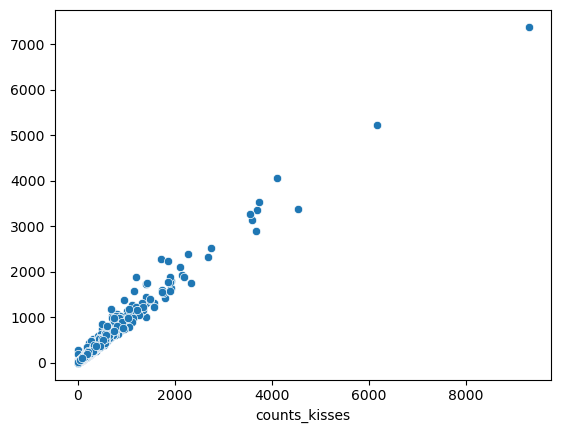

In [27]:
sb.scatterplot(x=y_train, y=pred3)

In [28]:
mod4 = AdaBoostRegressor(random_state=1)
mod4.fit(X_train,y_train)

AdaBoostRegressor(random_state=1)

In [29]:
pred4 = mod4.predict(X_train)
model_dict = {'model': "ADABoost"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_train, pred4)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,25610.068372,160.031461,64.328961,1.382519
1,Decision Tree,0.000000,0.000000,0.000000,0.000000
2,RandomForest,4926.094072,70.186139,21.620581,0.344084
3,ADABoost,51328.517732,226.557979,204.195794,2.512968


<Axes: xlabel='counts_kisses'>

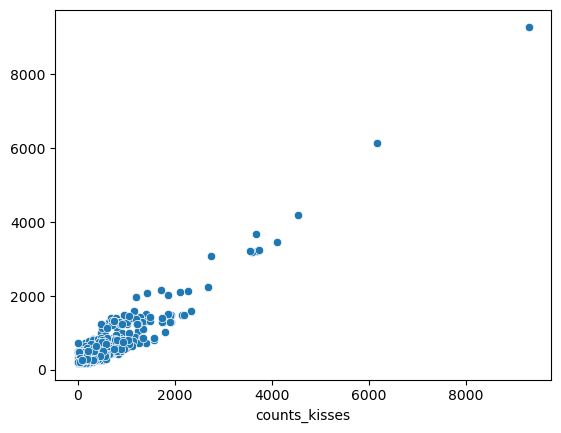

In [30]:
sb.scatterplot(x=y_train, y=pred4)

In [34]:
mod5 = GradientBoostingRegressor(random_state=1)
mod5.fit(X_train,y_train)

pred5 = mod5.predict(X_train)

In [35]:
# Ensure there are no zero or negative values for RMSLE calculation
pred5_pos = np.maximum(pred5, 0)  # Replace negative values with 0

In [36]:
model_dict = {'model': "GBM"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_train, pred5_pos)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,25610.068372,160.031461,64.328961,1.382519
1,Decision Tree,0.000000,0.000000,0.000000,0.000000
2,RandomForest,4926.094072,70.186139,21.620581,0.344084
3,ADABoost,51328.517732,226.557979,204.195794,2.512968
4,GBM,6227.069265,78.911782,40.914381,0.832653


<Axes: xlabel='counts_kisses'>

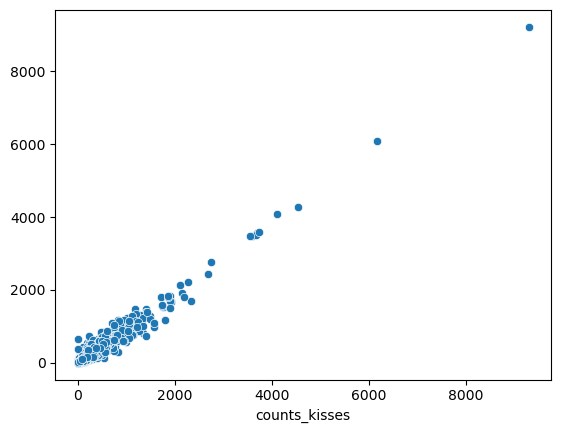

In [37]:
sb.scatterplot(x=y_train, y=pred5_pos)

In [38]:
mod6 = SVR()
mod6.fit(X_train,y_train)

SVR()

In [39]:
pred6 = mod6.predict(X_train)
model_dict = {'model': "SVM"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_train, pred6)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,25610.068372,160.031461,64.328961,1.382519
1,Decision Tree,0.000000,0.000000,0.000000,0.000000
2,RandomForest,4926.094072,70.186139,21.620581,0.344084
3,ADABoost,51328.517732,226.557979,204.195794,2.512968
4,GBM,6227.069265,78.911782,40.914381,0.832653
5,SVM,161299.488019,401.621075,139.424408,1.796727


<Axes: xlabel='counts_kisses'>

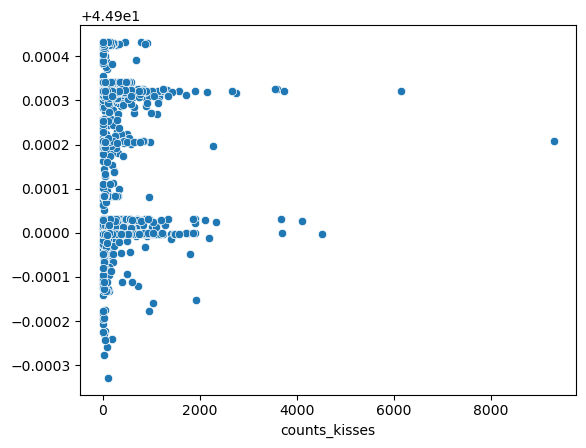

In [40]:
sb.scatterplot(x=y_train, y=pred6)

In [41]:
mod7= xgb.XGBRegressor()
mod7.fit(X_train,y_train)

pred7 = mod7.predict(X_train)

In [42]:
# Ensure there are no zero or negative values for RMSLE calculation
pred7_pos = np.maximum(pred7, 0)  # Replace negative values with 0

In [43]:
model_dict = {'model': "XGB"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_train, pred7_pos)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,25610.068372,160.031461,64.328961,1.382519
1,Decision Tree,0.000000,0.000000,0.000000,0.000000
2,RandomForest,4926.094072,70.186139,21.620581,0.344084
3,ADABoost,51328.517732,226.557979,204.195794,2.512968
4,GBM,6227.069265,78.911782,40.914381,0.832653
5,SVM,161299.488019,401.621075,139.424408,1.796727
6,XGB,237.527931,15.411941,9.897573,0.505279


<Axes: xlabel='counts_kisses'>

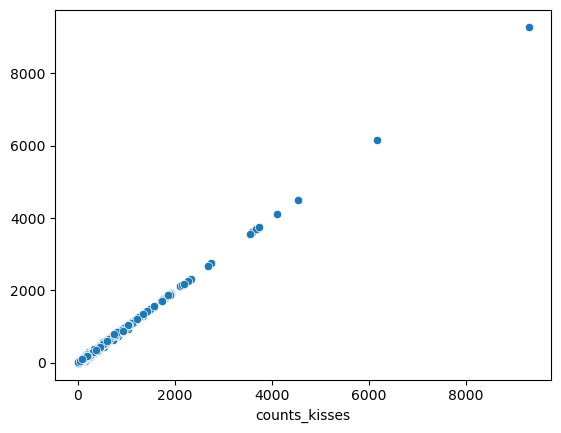

In [44]:
sb.scatterplot(x=y_train, y=pred7_pos)

In [45]:
models_list.sort_values('MAE')

,model,MSE,RMSE,MAE,RMSLE
1,Decision Tree,0.000000,0.000000,0.000000,0.000000
6,XGB,237.527931,15.411941,9.897573,0.505279
2,RandomForest,4926.094072,70.186139,21.620581,0.344084
4,GBM,6227.069265,78.911782,40.914381,0.832653
0,Linear Regression,25610.068372,160.031461,64.328961,1.382519
5,SVM,161299.488019,401.621075,139.424408,1.796727
3,ADABoost,51328.517732,226.557979,204.195794,2.512968


In [46]:
models_list.sort_values('RMSE')

,model,MSE,RMSE,MAE,RMSLE
1,Decision Tree,0.000000,0.000000,0.000000,0.000000
6,XGB,237.527931,15.411941,9.897573,0.505279
2,RandomForest,4926.094072,70.186139,21.620581,0.344084
4,GBM,6227.069265,78.911782,40.914381,0.832653
0,Linear Regression,25610.068372,160.031461,64.328961,1.382519
3,ADABoost,51328.517732,226.557979,204.195794,2.512968
5,SVM,161299.488019,401.621075,139.424408,1.796727
